Librerias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Condiciones Inciales

In [ ]:
#Condiciones 
t0 = 0.0     # Tiempo de inicio
tf = 30.0    # Tiempo final
h = 0.01     # Paso
Nx0 = 20.0     # Condición inicial presas
Ny0=20.0       # Condición inicial depredadores
#Parametros
a = 1.0
b = 0.02
c = 1.0
d = 0.01

Implementación Eulero

In [ ]:
nt = int((tf-t0)/h) #número de pasos
Nx = np.empty(nt+1)
Nx[0]=Nx0

Ny =np.empty(nt+1)
Ny[0]=Ny0

for step in range(nt):
  Nx[step+1] =Nx[step] + ((a * Nx[step] - b * Nx[step] * Ny[step])*h)
  Ny[step+1]=Ny[step]+((- c * Ny[step] + d* Nx[step] * Ny[step])*h)

In [ ]:
print('Función aproximada:',Nx)

Función aproximada: [20.         20.12       20.24136384 ...  9.79170243  9.82247278
  9.85394745]


In [ ]:
print('Función aproximada:',Ny)

Función aproximada: [20.         19.84       19.68151808 ... 34.28753748 33.97823544
 33.67182811]


Text(0.5, 1.0, 'Presa / Depredador')

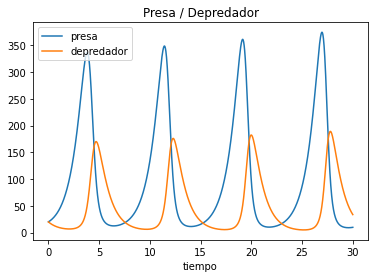

In [ ]:
t = np.arange(nt+1)* h
plt.plot(t, Nx, label='presa')
plt.plot(t, Ny, label='depredador')
plt.xlabel('tiempo')
plt.legend(loc = 'best')
plt.title('Presa / Depredador')

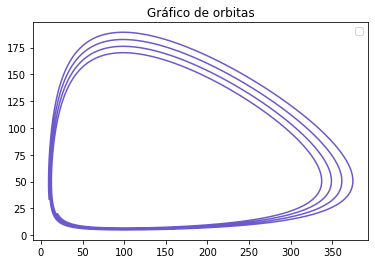

In [ ]:
plt.plot(Nx,Ny, color ='slateblue')
plt.legend(loc='best')
plt.title('Gráfico de orbitas')
plt.show()

Odeit 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
def df_dt(x, t, a, b, c, d):
    """Función del sistema en forma canónica"""
    dx = a * x[0] - b * x[0] * x[1]
    dy = - c * x[1] + d * x[0] * x[1]
    return np.array([dx, dy])
# Parámetros
a = 1
b = 0.02
c = 1
d = 0.01
# Condiciones iniciales
x0 = 20   # Presas
y0 = 20    # Depredadores
conds_iniciales = np.array([x0, y0])
# Condiciones para integración
tf = 30
N = 3001
t = np.linspace(0, tf, N)
solucion = odeint(df_dt, conds_iniciales, t, args=(a, b, c, d))


Text(0.5, 0, 'tiempo')

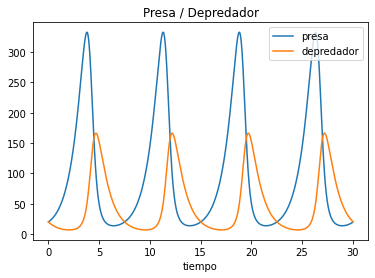

In [ ]:
plt.plot(t, solucion[:, 0], label='presa')
plt.plot(t, solucion[:, 1], label='depredador')
plt.legend(loc = 'best')
plt.title('Presa / Depredador')
plt.xlabel('tiempo')

Text(0.5, 1.0, 'Gráfico de orbitas')

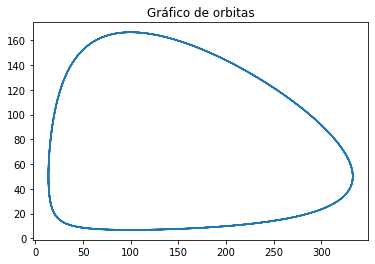

In [ ]:
x_max = np.max(solucion[:,0]) * 1.05
y_max = np.max(solucion[:,1]) * 1.05
x = np.linspace(0, x_max, 25)
y = np.linspace(0, y_max, 25)
xx, yy = np.meshgrid(x, y)
uu, vv = df_dt((xx, yy), 0, a, b, c, d)
norm = np.sqrt(uu**2 + vv**2)
plt.plot(solucion[:, 0], solucion[:, 1])
plt.title('Gráfico de orbitas')

Comparación

Text(0.5, 1.0, 'Presas')

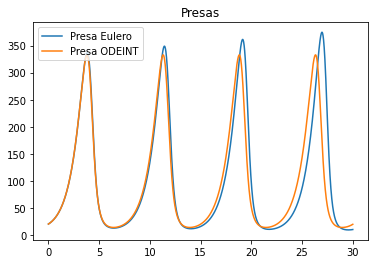

In [ ]:
plt.plot(t, Nx, label='Presa Eulero')
plt.plot(t, solucion[:, 0], label='Presa ODEINT')
plt.legend(loc = 'best')
plt.title('Presas')

Text(0.5, 1.0, 'Depredadores')

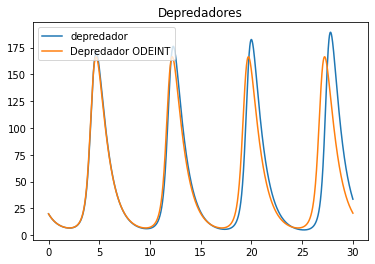

In [ ]:
plt.plot(t, Ny, label='depredador')
plt.plot(t, solucion[:, 1], label='Depredador ODEINT')
plt.legend(loc = 'best')
plt.legend(loc = 'best')
plt.title('Depredadores')